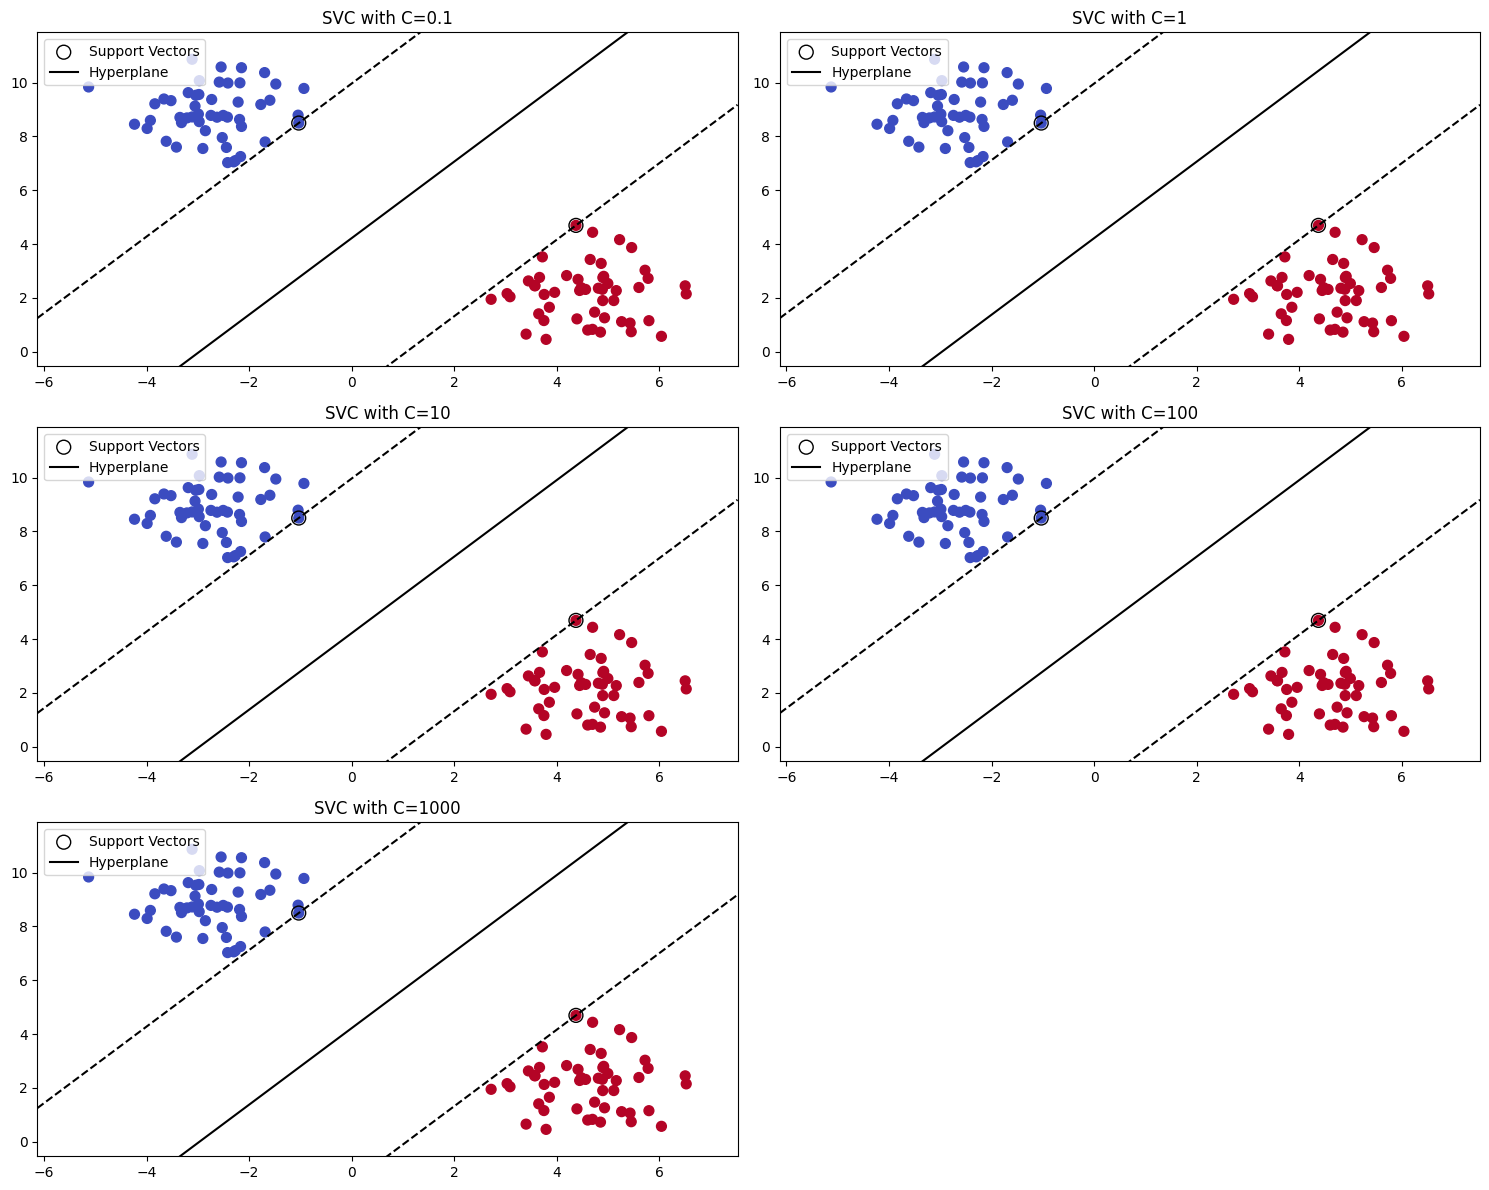

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVM compatibility

# Define a range of C values to simulate convergence steps
C_values = [0.1, 1, 10, 100, 1000]

# Set up the plot
plt.figure(figsize=(15, 12))

for i, C in enumerate(C_values, 1):
    # Initialize the SVM model with a specific C value
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Get the separating hyperplane parameters
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Calculate the slope and intercept of the hyperplane
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    
    # Plot the dataset and support vectors
    plt.subplot(3, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', label="Support Vectors")
    
    # Define a range for the line
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max)
    yy = slope * xx + intercept
    
    # Plot the hyperplane
    plt.plot(xx, yy, 'k-', label="Hyperplane")
    
    # Plot the margin boundaries
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + slope ** 2) * margin
    yy_up = yy + np.sqrt(1 + slope ** 2) * margin
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.title(f"SVC with C={C}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()

plt.tight_layout()
plt.show()


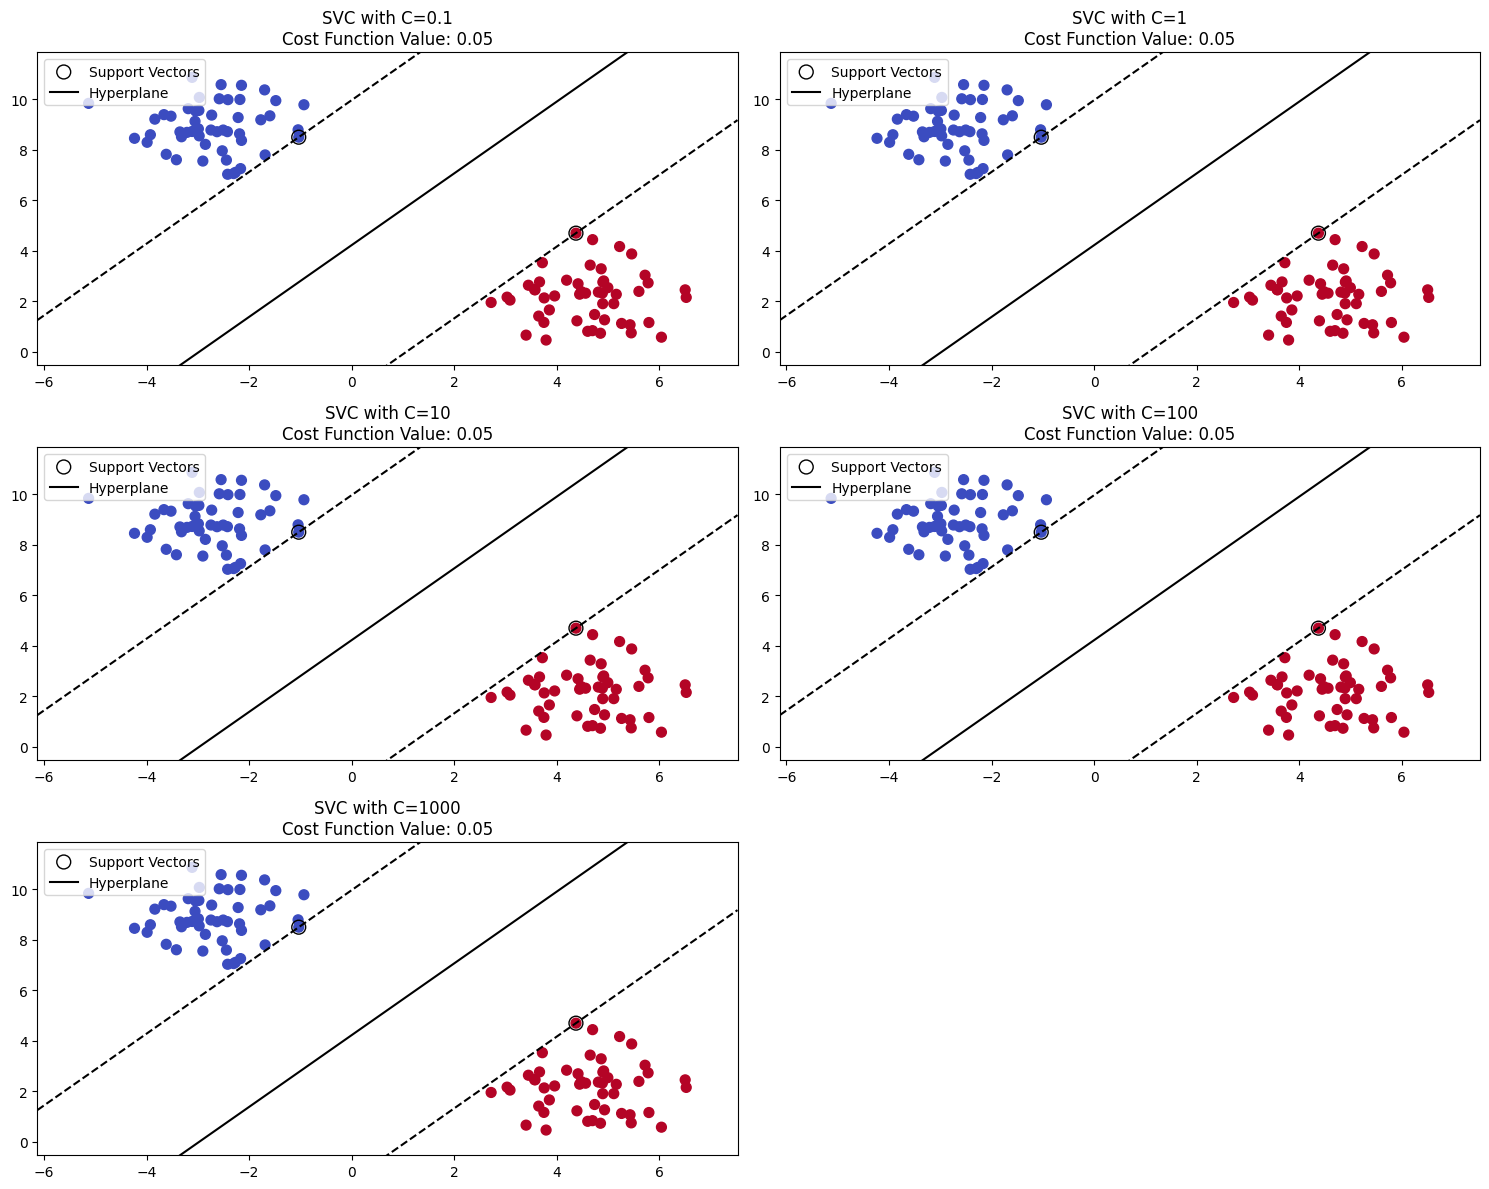

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVM compatibility

# Define a range of C values to simulate convergence steps
C_values = [0.1, 1, 10, 100, 1000]

# Set up the plot
plt.figure(figsize=(15, 12))

for i, C in enumerate(C_values, 1):
    # Initialize the SVM model with a specific C value
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Get the separating hyperplane parameters
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Calculate the slope and intercept of the hyperplane
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    
    # Calculate hinge loss to approximate the cost function value
    hinge_loss = np.sum(np.maximum(0, 1 - y * (X @ w + b)))
    cost_value = 0.5 * np.sum(w ** 2) + C * hinge_loss

    # Plot the dataset and support vectors
    plt.subplot(3, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', label="Support Vectors")
    
    # Define a range for the line
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max)
    yy = slope * xx + intercept
    
    # Plot the hyperplane
    plt.plot(xx, yy, 'k-', label="Hyperplane")
    
    # Plot the margin boundaries
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + slope ** 2) * margin
    yy_up = yy + np.sqrt(1 + slope ** 2) * margin
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.title(f"SVC with C={C}\nCost Function Value: {cost_value:.2f}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()

plt.tight_layout()
plt.show()


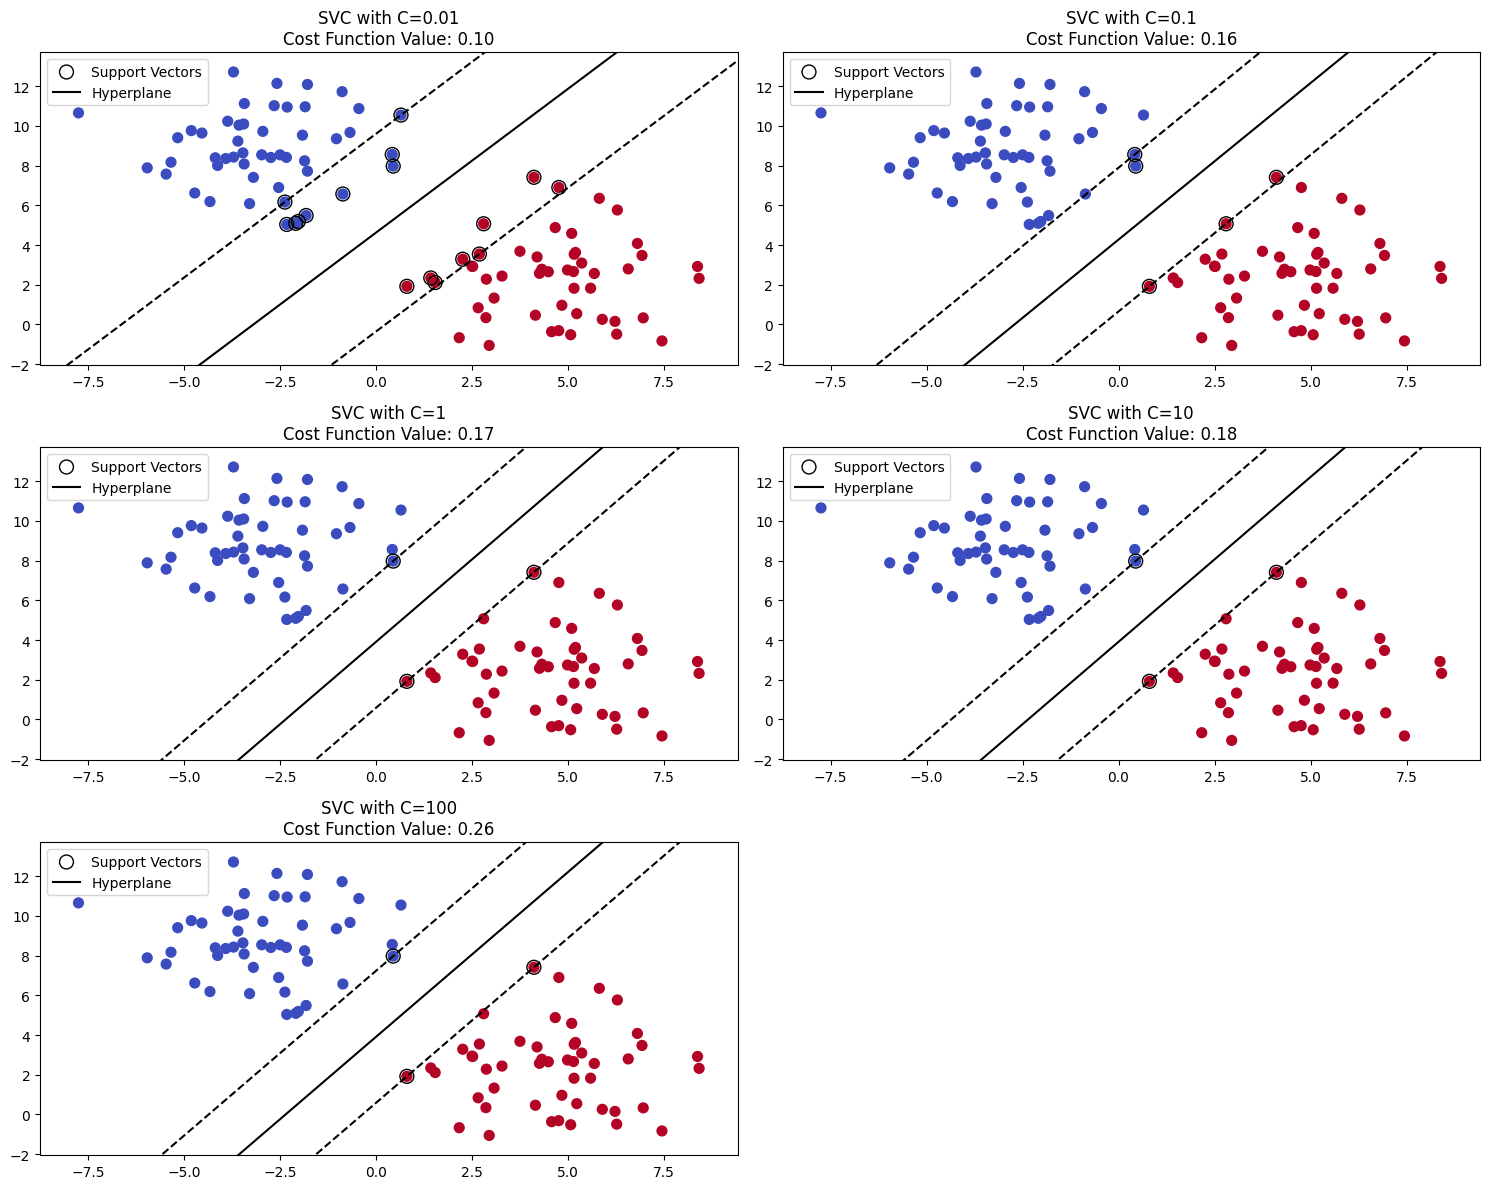

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create a dataset with overlapping classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2.0)  # Increased std for more overlap
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVM compatibility

# Define a range of C values to simulate convergence steps
C_values = [0.01, 0.1, 1, 10, 100]

# Set up the plot
plt.figure(figsize=(15, 12))

for i, C in enumerate(C_values, 1):
    # Initialize the SVM model with a specific C value
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Get the separating hyperplane parameters
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Calculate the slope and intercept of the hyperplane
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    
    # Calculate hinge loss to approximate the cost function value
    hinge_loss = np.sum(np.maximum(0, 1 - y * (X @ w + b)))
    cost_value = 0.5 * np.sum(w ** 2) + C * hinge_loss

    # Plot the dataset and support vectors
    plt.subplot(3, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', label="Support Vectors")
    
    # Define a range for the line
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max)
    yy = slope * xx + intercept
    
    # Plot the hyperplane
    plt.plot(xx, yy, 'k-', label="Hyperplane")
    
    # Plot the margin boundaries
    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy - np.sqrt(1 + slope ** 2) * margin
    yy_up = yy + np.sqrt(1 + slope ** 2) * margin
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    # Add the cost function value to the plot title
    plt.title(f"SVC with C={C}\nCost Function Value: {cost_value:.2f}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend()

plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [5]:
data = load_digits()

In [6]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
data.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
data['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [9]:
data['target']

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
X = data.data
y = data.target

In [11]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
X_train, X_test,  y_train ,y_test = train_test_split(X,y,test_size= 0.3,random_state= 32)

In [14]:
X_train

array([[ 0.,  0.,  0., ..., 15.,  2.,  0.],
       [ 0.,  0.,  5., ..., 16., 11.,  0.],
       [ 0.,  0.,  0., ..., 13.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  2., ...,  9.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
X_test

array([[ 0.,  1.,  5., ...,  5.,  0.,  0.],
       [ 0.,  0.,  4., ..., 12.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 12., ...,  2.,  0.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.]])

In [16]:
from sklearn.svm import SVC

In [17]:
classifier = SVC()

In [18]:
model.fit(X_train,y_train)

SVC(C=100, kernel='linear')

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_pred,y_test)

0.9833333333333333

## Dummy Data , Two Clusters

In [22]:
from sklearn.datasets import make_classification

In [23]:
X,y = make_classification(n_classes=2,n_samples=1000, n_clusters_per_class= 2, n_redundant= 1, random_state= 32, class_sep=2.0)

In [24]:
X

array([[-2.22940949,  1.87826786,  0.66610454, ...,  1.48946941,
        -0.61081156,  1.06502804],
       [-2.1586707 ,  1.82588854, -0.75283176, ...,  0.4934012 ,
        -0.64770525,  1.00502149],
       [ 2.11851331,  2.31671069, -0.04795749, ..., -0.52069827,
        -0.30107869, -1.05333926],
       ...,
       [ 1.97724342,  1.85693164,  0.91525484, ...,  0.34816696,
        -0.75904174,  0.0620389 ],
       [-1.79009825,  2.72644141,  0.52988094, ...,  1.28797097,
         1.56063509, -2.17338145],
       [ 1.82116689,  1.70276002, -0.25579724, ..., -0.57264218,
        -0.28993303,  3.28353569]])

In [25]:
y

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [26]:
import matplotlib.pyplot as plt

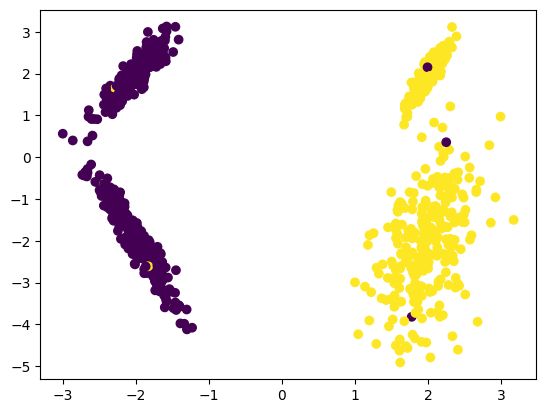

In [27]:
plt.scatter(X[:,0],X[:,1],c=y)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test , y_train, y_test = train_test_split(X , y, test_size= 0.3, random_state= 32) 

In [29]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [30]:
model.score(X_train,y_train)

0.9871428571428571

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9833333333333333

In [33]:
model.coef_

array([[ 0.59804823, -0.03084656, -0.08036392,  0.03511601, -0.05710654,
         0.0561503 ,  0.05480609, -0.08780649, -0.03886803, -0.08139137,
        -0.01412794,  0.05848665,  0.03652867, -0.04289437, -0.08007064,
        -0.00458034, -0.02080346, -0.00076537, -0.10519049, -0.02211516]])

In [34]:
model.intercept_

array([0.04568943])